### 调整模型结构 观察训练结果

In [1]:
# 导包
import torch
import torch.nn as nn
from torchvision.datasets import KMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

#### 1、超参数、数据集初始化

In [2]:
# 参数初始化
BATCH_SIZE = 50
lr = 0.01
epochs = 20

In [3]:
# 加载训练数据集
train_data = KMNIST(root='./kdata', train=True, download=True, transform=ToTensor())
# 拆分训练数据集
train_dl = DataLoader(train_data, batch_size=BATCH_SIZE)

# 加载测试数据集
test_data = KMNIST(root='./kdata', train=False, download=True, transform=ToTensor())
# 拆分测试数据集
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

#### 2、定义迭代训练模型函数

In [13]:
def train_iter(epochs, model, train_dl):
    train_hist = []
    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        for x, y in train_dl:
            y_hat = model(x.reshape(-1, 784))
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # print(f"epoch: {epoch}  loss: {loss.item()}")
        train_hist.append(loss.item())
    return train_hist

#### 3、定义历史梯度画像函数

In [14]:
import matplotlib.pyplot as plt
def draw_train_hist(hist):
    plt.plot(hist)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

#### 4、定义测试验证函数

In [17]:
def test_acc(test_dl, model):
    # 总样本数
    total = 0
    # 正确分类数
    correct = 0

    with torch.no_grad():
        for x, y in test_dl:
            y_hat = model(x.reshape(-1, 784))
            max_val, max_idx = torch.max(y_hat, 1)
            total += y.size(0)
            correct += (max_idx == y).sum().item()
    print(f'Accuracy: {correct / total}')
    return correct/total*100

In [18]:
# Sigmoid
model1 = nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Linear(512, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10)
)

In [19]:
# ReLU
model2 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [20]:
# 少一层
model3 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

#### 5、训练模型

In [21]:
model1_hist = train_iter(epochs, model1, train_dl)
model2_hist = train_iter(epochs, model2, train_dl)
model3_hist = train_iter(epochs, model3, train_dl)

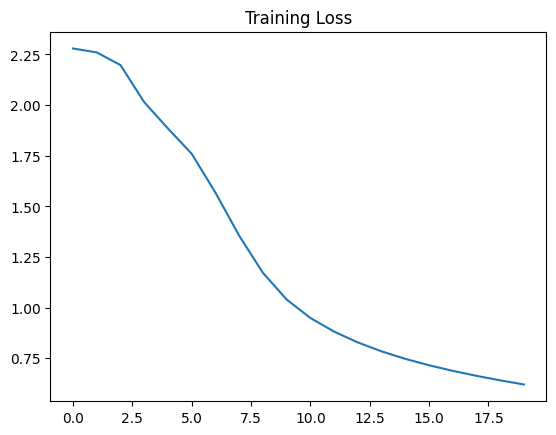

In [22]:
draw_train_hist(model1_hist)

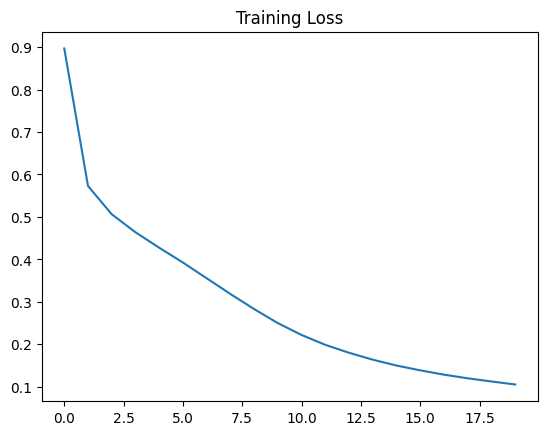

In [23]:
draw_train_hist(model2_hist)

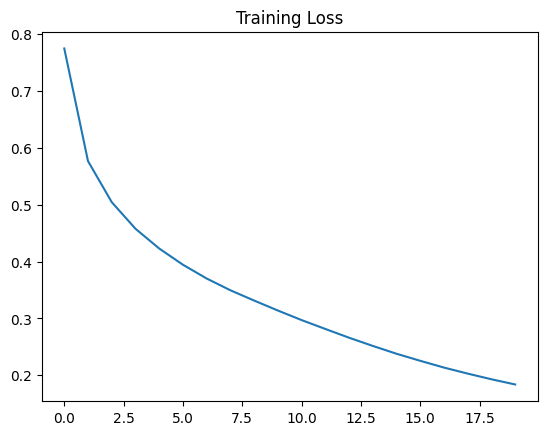

In [24]:
draw_train_hist(model3_hist)

#### 6、测试模型

In [25]:
print('Model1 Acc:', test_acc(test_dl, model1))
print('Model2 Acc:', test_acc(test_dl, model2))
print('Model3 Acc:', test_acc(test_dl, model3))

Accuracy: 0.6301
Model1 Acc: 63.01
Accuracy: 0.8724
Model2 Acc: 87.24
Accuracy: 0.8401
Model3 Acc: 84.00999999999999
